## Exploratory data analysis
### Critical temperature of a superconductor

*Submitted By: Rabindra Nepal*

In [37]:
import os, math, time
import numpy as np
import pandas as pd
import random
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [38]:
# data
df = pd.read_csv('./data/train.csv')
unique_materials = pd.read_csv('./data/unique_m.csv')

In [39]:
df.shape

(21263, 82)

In [4]:
# not Fe or Cu based superconductors
def other_class(unique_materials):
    other_class = []
    for f, c in zip(unique_materials.Fe.values, unique_materials.Cu.values):
        if f == 0.0 and c == 0.0:
            other_class.append(1.0)
        else:
            other_class.append(0.0)
    return np.array(other_class)

In [5]:
# adding some new columns in df
df['material'] = unique_materials.material
df['Fe'] = unique_materials.Fe
df['Cu'] = unique_materials.Cu
df['Other'] = other_class(unique_materials)

In [6]:
category_values = []
for f, c, o in zip(df.Fe.values, df.Cu.values, df.Other.values):
    if f != 0:
        category_values.append("Fe-based")
    elif c != 0:
        category_values.append("Cu-based")
    else:
        category_values.append("Other")
df['category'] = np.array(category_values)

In [7]:
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,material,Fe,Cu,Other,category
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,1,1.085714,0.433013,0.437059,29.0,Ba0.2La1.8Cu1O4,0.0,1.0,0.0,Cu-based
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2,1.128571,0.632456,0.468606,26.0,Ba0.1La1.9Ag0.1Cu0.9O4,0.0,0.9,0.0,Cu-based
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,1,1.114286,0.433013,0.444697,19.0,Ba0.1La1.9Cu1O4,0.0,1.0,0.0,Cu-based
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,1,1.100000,0.433013,0.440952,22.0,Ba0.15La1.85Cu1O4,0.0,1.0,0.0,Cu-based
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,1,1.057143,0.433013,0.428809,23.0,Ba0.3La1.7Cu1O4,0.0,1.0,0.0,Cu-based


In [8]:
# critical temperature range

min(df.critical_temp.values), max(df.critical_temp.values)

(0.00021, 185.0)

In [10]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,Fe,Cu,Other
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219,0.153182,1.276751,0.401401
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362,0.713075,2.079375,0.490193
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210,0.000000,0.000000,0.000000
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000,0.000000,0.000000,0.000000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000,0.000000,0.900000,0.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000,0.000000,2.815000,1.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000,30.000000,98.000000,1.000000


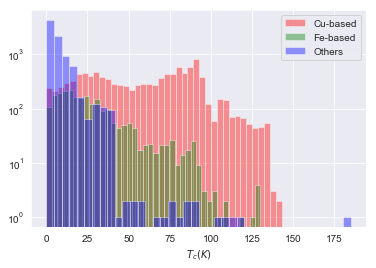

In [11]:
# Critical temperature distributions
sns.set_style("darkgrid")
sns.distplot(df[df.Cu != 0.0].critical_temp, bins=40, hist=True, kde=False , color='red', axlabel='$T_c(K)$', label="Cu-based");
ax = sns.distplot(df[df.Fe != 0.0].critical_temp, bins=40, hist=True, kde=False, color='green', axlabel='$T_c(K)$', label='Fe-based');
sns.distplot(df[df.Other != 0.0].critical_temp, bins=40, hist=True, kde=False, color='blue', axlabel='$T_c(K)$', label="Others");
ax.set_yscale('log')
plt.legend();
plt.savefig("data-distribution.pdf")

In [12]:
# correlated variables
def collinear_features(df):
    corr_matrix = df.corr().values
    indices = df.corr().index
    feature_pairs = list()
    
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix[i])):
            if abs(corr_matrix[i][j]) > 0.98 and indices[i] != indices[j]:
                feature_pairs.append((indices[i], indices[j], corr_matrix[i][j]))
    return feature_pairs

In [14]:
# highly correlated features pairs
corr_features = collinear_features(df)
corr_features

[('wtd_mean_fie', 'wtd_gmean_fie', 0.992331090577115),
 ('wtd_gmean_fie', 'wtd_mean_fie', 0.992331090577115),
 ('entropy_fie', 'entropy_atomic_radius', 0.9977393708000881),
 ('entropy_fie', 'entropy_Valence', 0.9927256131485039),
 ('range_fie', 'std_fie', 0.981628309389125),
 ('std_fie', 'range_fie', 0.981628309389125),
 ('wtd_mean_atomic_radius', 'wtd_gmean_atomic_radius', 0.9801072037308243),
 ('wtd_gmean_atomic_radius', 'wtd_mean_atomic_radius', 0.9801072037308243),
 ('entropy_atomic_radius', 'entropy_fie', 0.9977393708000881),
 ('entropy_atomic_radius', 'entropy_Valence', 0.9895461180638894),
 ('range_FusionHeat', 'std_FusionHeat', 0.9845735869948631),
 ('std_FusionHeat', 'range_FusionHeat', 0.9845735869948631),
 ('range_ThermalConductivity', 'std_ThermalConductivity', 0.9878665518580511),
 ('std_ThermalConductivity', 'range_ThermalConductivity', 0.9878665518580511),
 ('mean_Valence', 'gmean_Valence', 0.9899105095412434),
 ('wtd_mean_Valence', 'wtd_gmean_Valence', 0.994938772458464

#### Visualizing some collinear features

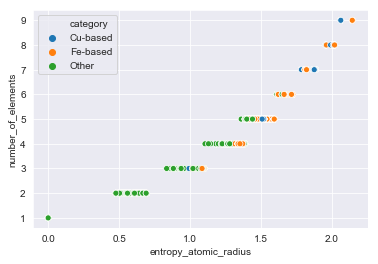

In [15]:
sns.scatterplot(x='entropy_atomic_radius', y='number_of_elements', data=df, hue='category');

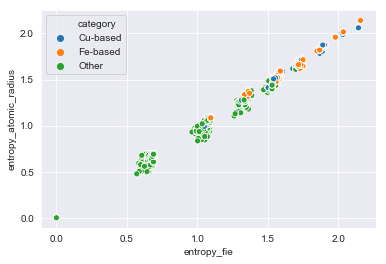

In [16]:
sns.scatterplot(x='entropy_fie', y='entropy_atomic_radius', data=df, hue='category');

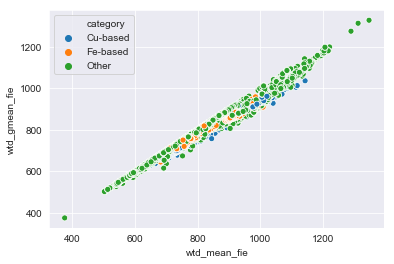

In [17]:
sns.scatterplot(x='wtd_mean_fie', y='wtd_gmean_fie', data=df, hue='category');

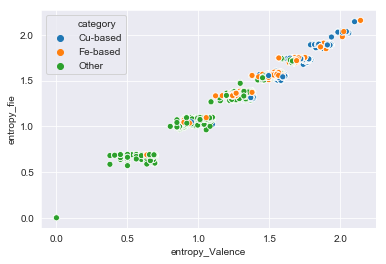

In [19]:
sns.scatterplot(x='entropy_Valence', y='entropy_fie', data=df, hue='category');

#### PCA

Principle component analysis is useful in following three cases:

1. If the number of the features in the dataset is very large and want to decrease it to use in the model
2. If there are collinear features in the dataset
3. If the features distribution is not important for later use. Once we use PCA the original features are lost.

### Correlation with target - T_c

In [26]:
imp_features = df.corr()['critical_temp'].abs().sort_values(ascending=False)[:10].index.values

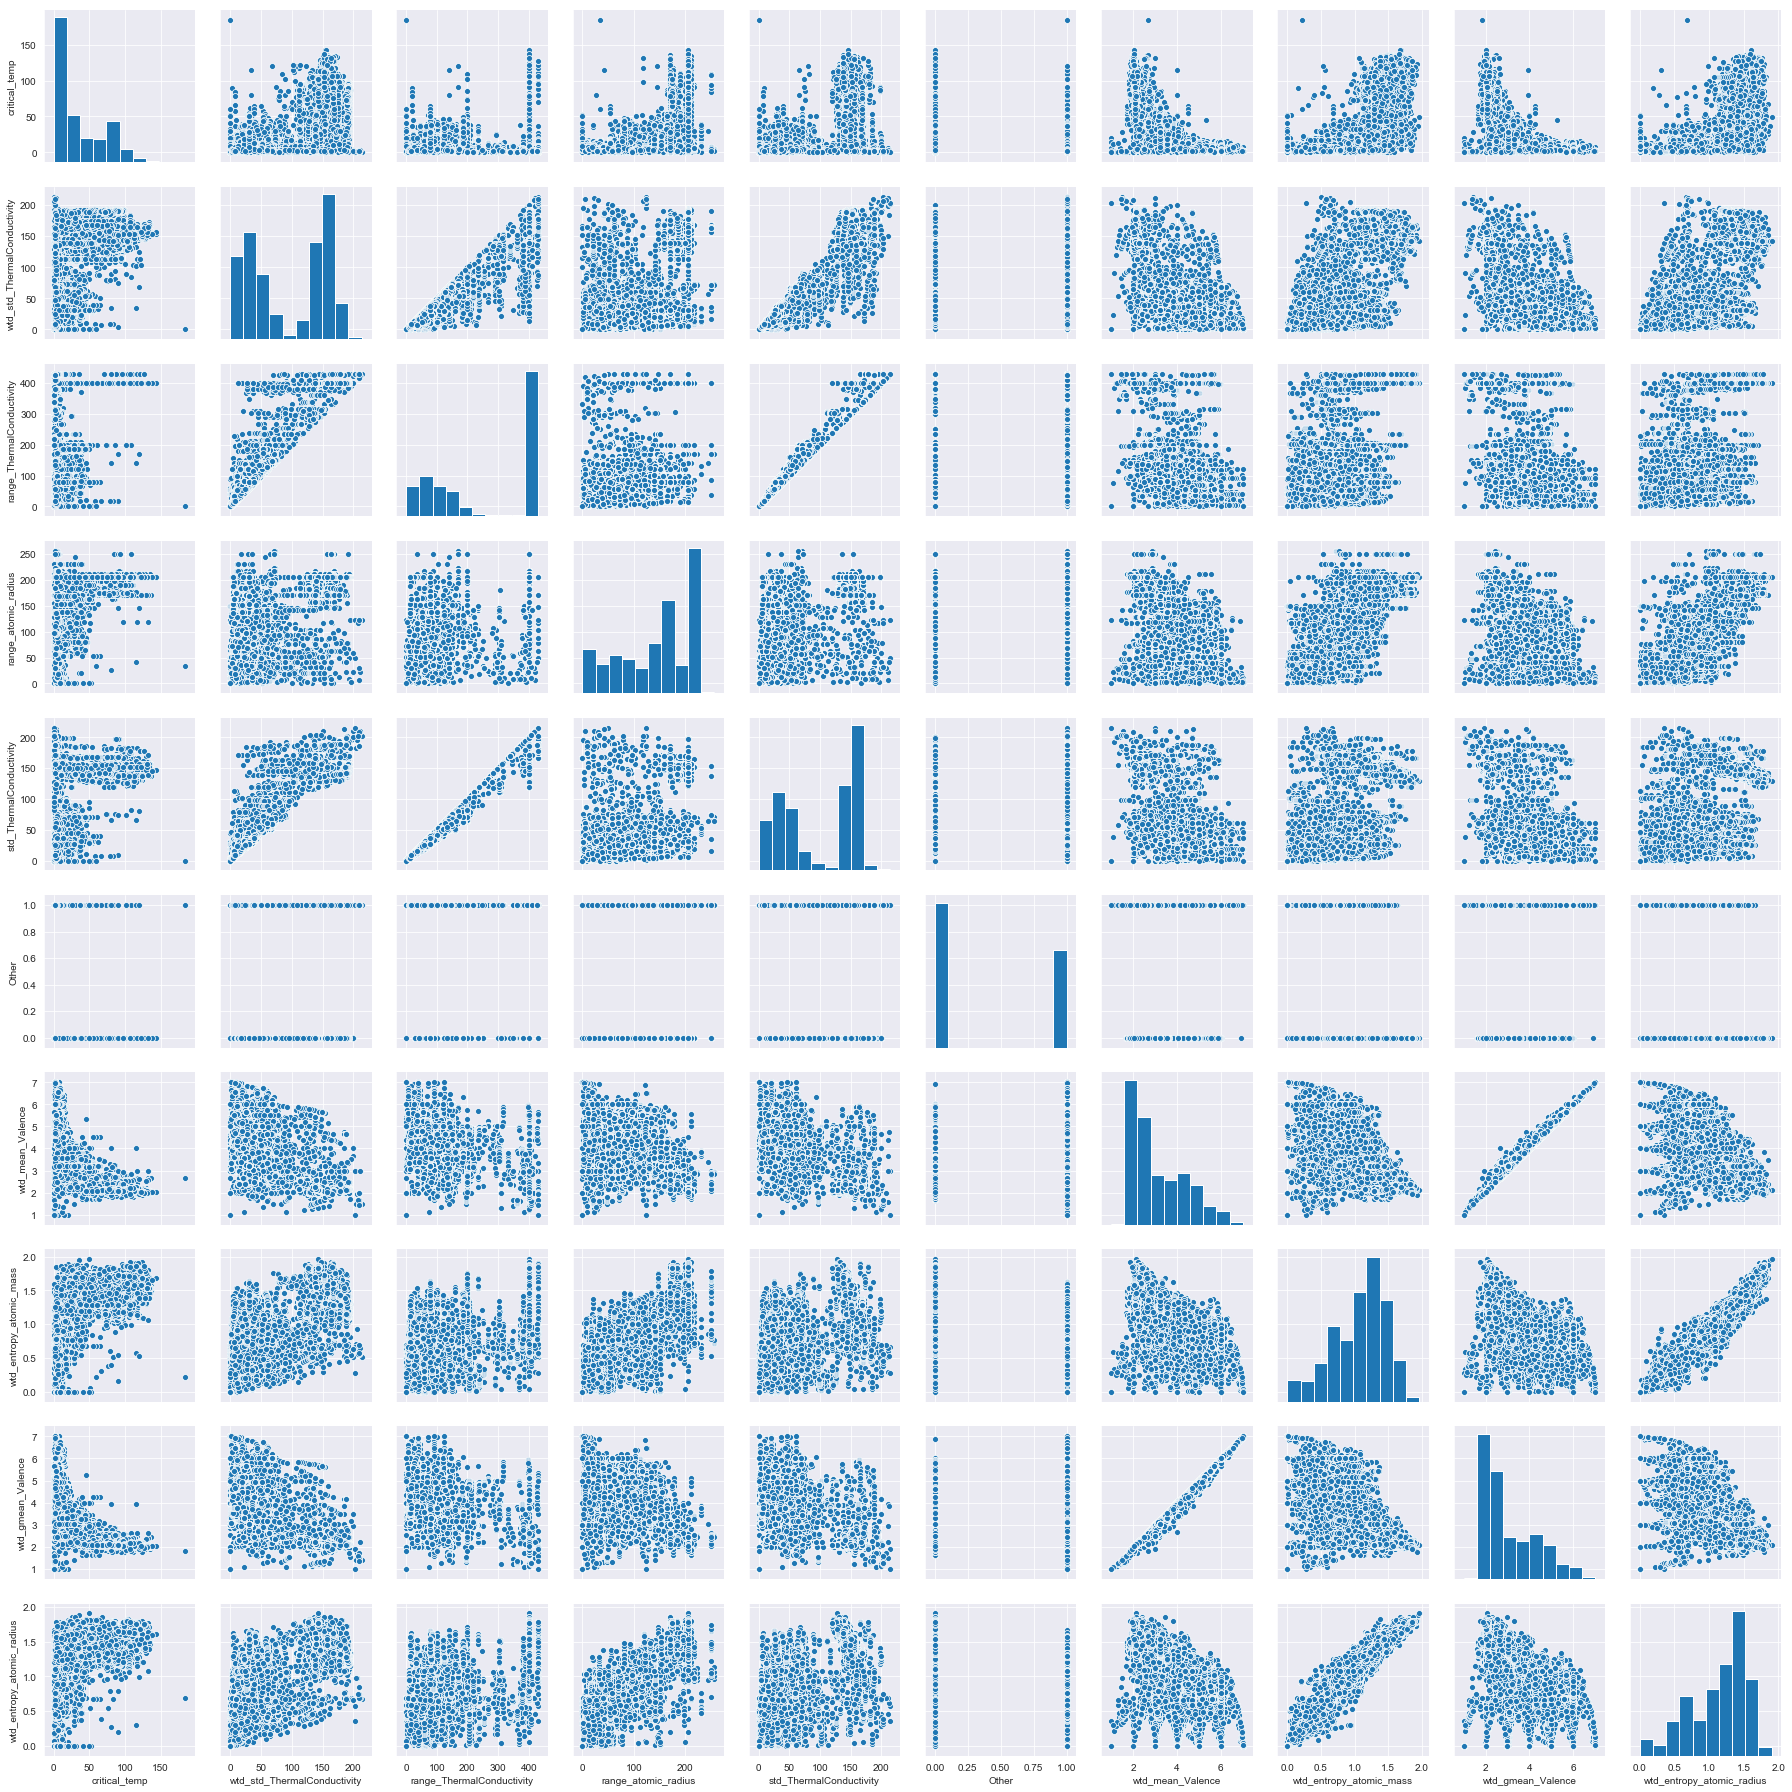

In [29]:
sns.pairplot(data=df[list(imp_features)]);